In [3]:
# Three layer antireflection coating made of porous silicon with air as incident medium and silicon substrate.
# Solar Energy Materials & Solar Cells 95 (2011) 3069-3073 (Figure 6).

In [1]:
# Load modules
using PyPlot
close("all")
include("TMMOptics.jl") # main calculation program
using Main.TMMOptics
include("RIdb.jl") # collection of refractive indexes data
using Main.RIdb: air, silicon
include("MixingRules.jl") # collection of mixing rules for dielectric functions
using Main.MixingRules: looyengaspheres
include("nplot.jl")

nplot (generic function with 1 method)

In [2]:
# Define beam
λi = 400 # intial wavelength [nm]
λf = 1000 # final wavelength [nm]
λ = LinRange(λi, λf, λf-λi+1) # wavelength range [nm]
# λ = λi:λf
λ0 = 700. # reference wavelength
θ = [0.] # angle of incidence [degrees]
p = 1. # polatization (s-wave = 0. and p-wave = 1., or any intermediate)
beam = PlaneWave(λ, λ0, θ, p);

In [3]:
# Define type of layers with their indexes of refraction and thicknesses
l0 = Geometrical(air(beam.λ), 0.);
l1 = Geometrical(looyengaspheres(air(beam.λ),silicon(beam.λ),0.89), 77.);
l2 = Geometrical(looyengaspheres(air(beam.λ),silicon(beam.λ),0.70), 56.);
l3 = Geometrical(looyengaspheres(air(beam.λ),silicon(beam.λ),0.41), 39.);
l4 = Geometrical(silicon(beam.λ), 0.);

In [4]:
# Sequence of materials: elements represent the index position below in the structure (surface down to substrate)
nseq = [l0 l1 l2 l3 l4];

In [5]:
# Perform computation
results = thinfilmoptics(beam, nseq);

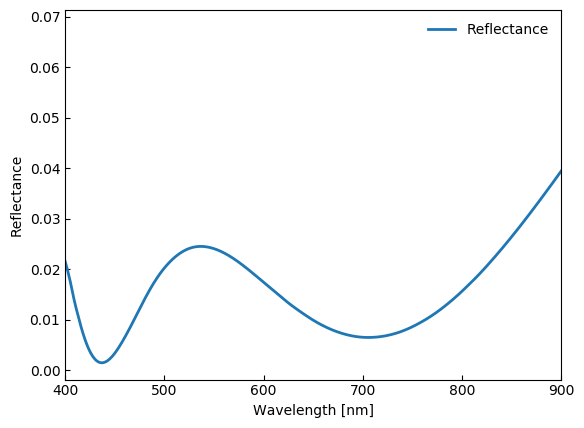

(400, 900)

In [6]:
# plot the R, T and A spectra
plot(λ, results.Spectra.Rp, label="Reflectance")
legend(loc="best")
xlabel("Wavelength [nm]")
ylabel("Reflectance")
xlim(400,900)

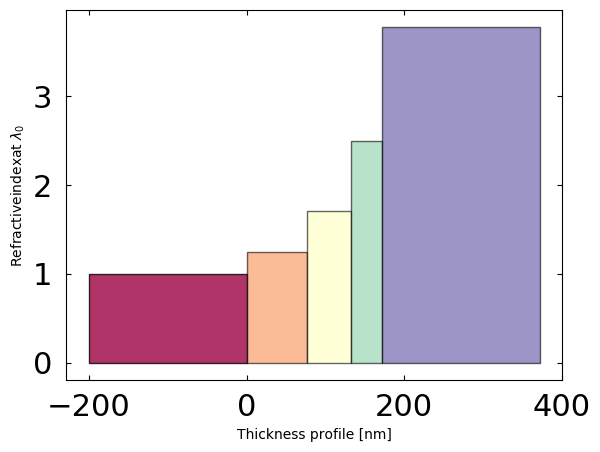

In [7]:
# plot the refractive index profile
nplot(beam.λ, beam.θ, beam.λ0, results.Misc.d, results.Misc.ℓ, results.Field.emfp, results.Misc.nλ0, nseq)

In [ ]:
# Notice in the profiles that the first and last media do not have any thickness, but were assigned 200 nm for
# the plotting purpose.